In [13]:
import pandas as pd

In [14]:

df = pd.read_csv('sab-bma.csv')


In [15]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCACCTTCAAGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGGAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9735,CCATTTCCCACACGAGAGCCCGGCTTTCCTGTCACATTTGGTAAGG...,AGGCTAACACACCTATTATATAACCACTCTTAGCCCATAGGACTAC...
9736,TTGATAGGTCATTTACGGCGCGCGAGCCGCATAGGGTAGTAGGGAT...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGTATGGGCCCC...
9737,GTTAGTGACCTAGCCGGGCTATTGGCGAGACTTACCTAACGGAGTT...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9738,CTGTTCAGACGACGATATACGGCCCTGCATTGTATTGTAAAAGCGT...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...


In [16]:
from tqdm import tqdm


In [17]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [18]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [19]:
import difflib


In [20]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [21]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 9740/9740 [00:00<00:00, 65337.58it/s]

[7179, 7126, 7175, 7188, 7180, 7128, 7195, 7175, 7129, 7227, 7239, 7235, 7231, 7120, 7195, 7160, 7226, 7183, 7156, 7276, 7235, 7212, 7234, 7269, 7222, 7230, 7204, 7217, 7224, 7198, 7250, 7194, 7237, 7191, 7199, 7239, 7244, 7220, 7226, 7152, 7202, 7245, 7234, 7117, 7244, 7189, 7250, 7229, 7223, 7268, 7195, 7204, 7188, 7166, 7236, 7209, 7282, 7244, 7294, 7281, 7294, 7252, 7294, 7174, 7230, 7141, 7210, 7242, 7180, 7203, 7260, 7194, 7211, 7198, 7231, 7154, 7219, 7208, 7291, 7173, 7287, 7170, 7254, 7227, 7217, 7245, 7233, 7228, 7141, 7140, 7221, 7178, 7216, 7204, 7202, 7128, 7101, 7217, 7177, 7254, 7155, 7135, 7204, 7228, 7216, 7184, 7125, 7141, 7172, 7127, 0]


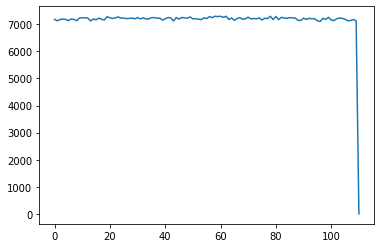

In [22]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [23]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 9740/9740 [00:13<00:00, 741.11it/s]


In [24]:
import numpy as np


In [25]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [26]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> ATAATA 6
TCT -> AG 6
 -> CTGGC 6
ATGA -> C 6
 -> TCGCG 6
 -> ACCAA 6
G -> CTTC 6
C -> TTGT 6
TG -> ACA 6
 -> CTCTG 6
GAGAG ->  6
C -> TATT 6
GAATA ->  6
 -> TAATA 6
 -> ACAGG 6
GAAGG ->  6
ATTTC ->  6
 -> TCAAT 6
ATTCC ->  6
GAACG ->  6
C -> TTTT 6
T -> GCCA 6
C -> AAGG 6
 -> TCCAT 6
TG -> AAC 6
 -> TATCT 6
 -> AGTCG 6
C -> ATG 6
 -> CTACT 6
 -> TCCCT 6
TCTCT ->  6
TTTG -> A 6
 -> TACAC 6
GACT ->  6
 -> CTCCA 6
G -> TATT 6
ATGTA ->  6
TCCC -> G 6
 -> AGGTA 6
 -> GGTTA 6
CC -> AAA 6
 -> GAGTG 6
CTCTC ->  6
CTCT -> A 6
CTCCC ->  6
CTCAT ->  6
 -> ACGGAG 6
 -> GGGCC 6
 -> GATGA 6
CTAGC ->  6
 -> GGGAC 6
 -> GGCAG 6
CCCAC ->  6
CTGCA ->  6
TATTT ->  6
CT -> AAA 6
 -> ACTAT 6
CCTA -> G 6
CCTC -> G 6
CGGTG ->  6
CGGGC ->  6
CGGG -> A 6
CCTG -> A 6
CGGCC ->  6
 -> AGACC 6
 -> GCGGA 6
CGG -> AA 6
 -> GCCAG 6
TAGGT ->  6
TATTC ->  6
 -> GGTTG 6
TCAT -> G 6
CTGT -> A 6
G -> CCCC 6
 -> GTTCT 6
 -> GTTAA 6
 -> CTTGC 6
TCGGA ->  6
 -> GTGCC 6
TCCTC ->  6
 -> GTCTC 6
TTCTA ->  6
 -> GAAGA 6
G ->

In [27]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [28]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


 -> CG @ 54 6
 -> CGC @ 3 6
GT ->  @ 20 6
AA ->  @ 14 6
T -> G @ 101 6
 -> CA @ 49 6
GT ->  @ 11 6
 -> CG @ 5 6
GT ->  @ 106 6
AA ->  @ 22 6
AC ->  @ 19 6
AA ->  @ 20 6
AA ->  @ 12 6
GT ->  @ 13 6
 -> CA @ 5 6
 -> CG @ 26 6
 -> AT @ 27 6
 -> CC @ 92 6
A -> T @ 37 6
 -> AT @ 107 6
GT ->  @ 84 6
GT ->  @ 69 6
 -> CC @ 2 6
 -> AT @ 108 6
GC ->  @ 20 6
TC ->  @ 103 6
 -> CC @ 43 6
GC ->  @ 11 6
 -> AT @ 18 6
 -> AT @ 32 6
 -> AT @ 19 6
A -> T @ 12 6
TC ->  @ 13 6
 -> AT @ 21 6
A -> T @ 27 6
TC ->  @ 14 6
 -> AT @ 28 6
 -> CC @ 34 6
 -> AT @ 25 6
 -> AT @ 44 6
GT ->  @ 21 6
GT ->  @ 60 6
GT ->  @ 6 6
 -> CG @ 56 6
GT ->  @ 25 6
GT ->  @ 26 6
 -> CG @ 24 6
AC ->  @ 103 6
GT ->  @ 28 6
A -> T @ 77 6
 -> CG @ 2 6
 -> CG @ 82 6
 -> CG @ 108 6
 -> CA @ 77 6
 -> CC @ 77 6
 -> CG @ 103 6
 -> CG @ 100 6
TCG ->  @ 110 6
 -> CG @ 10 6
TG ->  @ 85 6
AG ->  @ 35 6
 -> CAA @ 4 6
GT ->  @ 53 6
 -> AT @ 58 6
 -> AT @ 49 6
A -> T @ 14 6
A -> C @ 93 6
AT ->  @ 13 6
TA ->  @ 49 6
A -> G @ 52 6
TA ->  @ 39 6


In [29]:
import matplotlib.pyplot as plt

In [30]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[5605, 2567, 2326, 2388, 2266, 2233, 2079, 2057, 1927, 1890, 1854, 1873, 1734, 1712, 1668, 1646, 1639, 1567, 1627, 1523, 1434, 1453, 1455, 1423, 1403, 1414, 1318, 1335, 1287, 1297, 1311, 1294, 1291, 1196, 1234, 1245, 1199, 1185, 1127, 1139, 1105, 1165, 1160, 1124, 1135, 1115, 1114, 1084, 1077, 1101, 1032, 1059, 1047, 1045, 1098, 1042, 1111, 1032, 1048, 1065, 1048, 1036, 1019, 1018, 1012, 991, 1004, 1036, 970, 985, 1003, 995, 993, 1002, 1023, 938, 989, 969, 994, 995, 1000, 960, 944, 990, 1011, 978, 995, 972, 986, 970, 1024, 1022, 1058, 997, 1045, 1034, 1090, 1059, 1105, 1116, 1084, 1130, 1168, 1148, 1206, 1196, 1208, 1142, 1110, 1054, 9176]


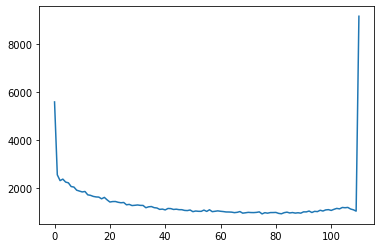

In [31]:
plt.plot(range(strand_len + 1), pos_counts)

In [32]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[208, 43, 66, 67, 58, 59, 64, 62, 62, 51, 39, 52, 50, 42, 47, 39, 43, 37, 34, 34, 29, 35, 31, 29, 27, 28, 33, 24, 31, 13, 21, 33, 30, 33, 23, 29, 19, 30, 37, 14, 23, 25, 19, 35, 21, 31, 23, 17, 21, 23, 26, 20, 18, 22, 29, 25, 24, 29, 28, 19, 30, 19, 21, 25, 21, 22, 24, 17, 20, 19, 18, 20, 28, 22, 21, 25, 20, 14, 17, 21, 14, 14, 15, 17, 21, 10, 24, 16, 24, 17, 24, 26, 23, 17, 21, 13, 19, 21, 25, 18, 19, 25, 36, 24, 28, 23, 23, 27, 45, 48, 54]


In [33]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


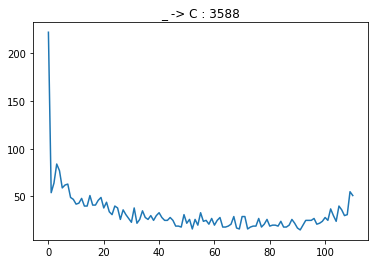

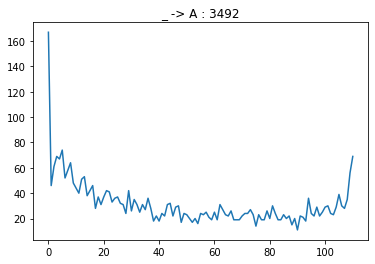

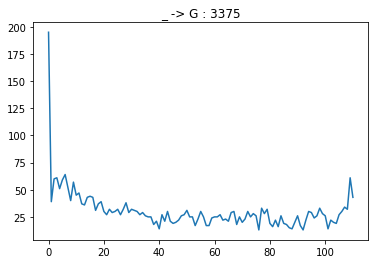

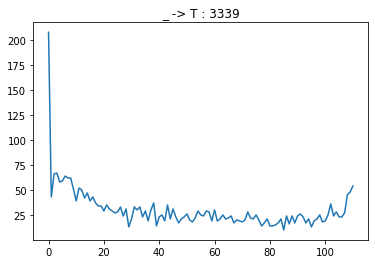

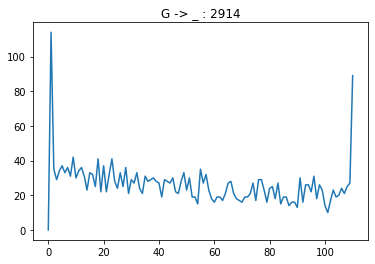

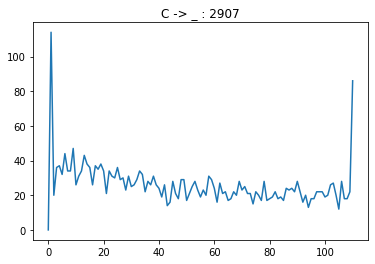

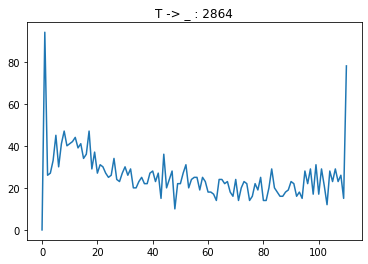

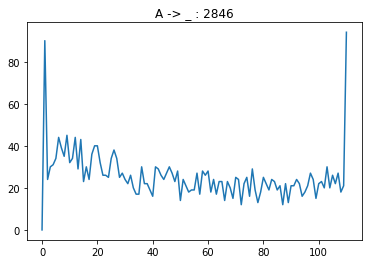

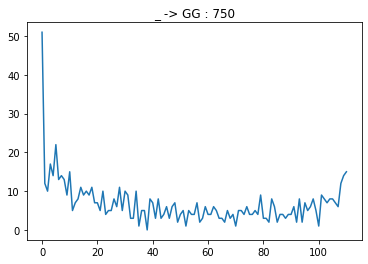

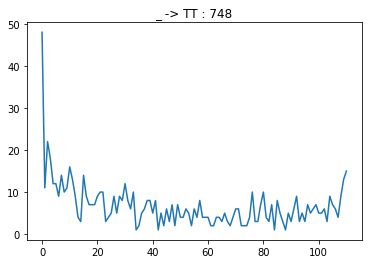

In [34]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [35]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)